In [26]:
import statsmodels.api as sm
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import os, sys
import warnings

warnings.filterwarnings("ignore")

In [27]:
np.random.seed(12345)
time = np.arange(100)
ar1_sample = np.zeros(100)
ar1_sample[0] += np.random.normal(loc  = 0, scale = 2.5, size = 1 )

In [28]:
for t in time[1:]:
    ar1_sample[t] = (0.7 * ar1_sample[t-1]) + np.random.normal(loc = 0, scale = 2.5, size = 1)

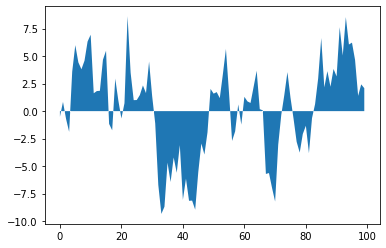

In [29]:
plt.fill_between(time, ar1_sample)
plt.show()

In [32]:
#Using ARMA model from statsmodel packages
model = sm.tsa.ARMA(ar1_sample, (1,0)).fit(trend="nc", disp=0 )
model.params

In [33]:
#create autocorrelation data 
np.random.seed(1244)
#Mean is again 0 
ar2_sample = np.zeros(100)
#set first two values to  random  values with expected mean of 0  and std of 2.5
ar2_sample[0:2]  += np.random.normal(loc = 0, scale = 2.5, size = 2 )
#set future values 0.3  times  the prior  value and 0.3 times valuye  two prior 
for t in time[2:]:
    ar2_sample[t] = (0.3 * ar2_sample[t-1]) + (0.3 * ar2_sample[t-2] + np.random.normal(loc = 0, scale = 2.5, size = 1))

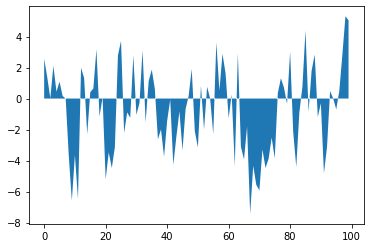

In [35]:
plt.fill_between(time, ar2_sample)
plt.show()

In [36]:
model = sm.tsa.ARMA(ar2_sample, (2,0)).fit(trend = 'nc', disp = 0)
model.params

In [37]:
#Below is function to help in generating different series
from statsmodels.tsa.arima_process import arma_generate_sample

arparams = np.array([0.3, 0.3])
maparams = np.array([0])
ar = np.r_[1, -arparams] # add 0 lag and negate np.r_ making simple it one  arr
ma = np.r_[1, maparams] # add zero lags 
y = arma_generate_sample(ar, ma, 100)


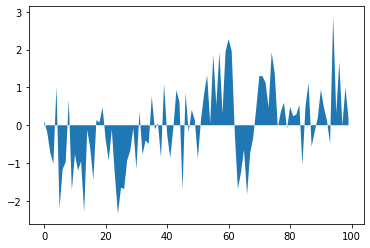

In [39]:
plt.fill_between(time, y)
plt.show()

In [40]:
#again running statsmodel arma to predict paramaters for generated  data 

model = sm.tsa.ARMA(y, (2,0)).fit(trend = 'nc', disp=0)
model.params

# Moving Average MA Models

In [45]:
np.random.seed(123)

time = np.arange(100)

ma1_sample = np.zeros(100)

error = np.random.normal(loc = 0, scale = 2.5, size = 100)

ma1_sample[0] += error[0]

In [49]:
for t in time[1:]:
    ma1_sample[t] = (0.4 * error[t-1]) + error[t]

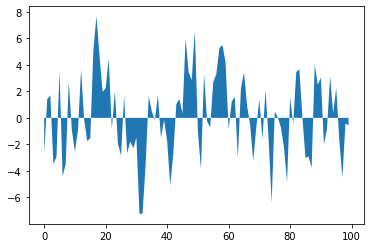

In [51]:
plt.fill_between(time, ma1_sample)
plt.show()

In [58]:
#find model params for generated sample

model = sm.tsa.ARMA(ma1_sample, (0,1)).fit(trend='nc', disp = 0)

model.params

In [67]:
np.random.seed(1234)

time = np.arange(100)

ma2_sample = np.zeros(100)

error = np.random.normal(loc = 0, scale = 2.5, size = 100)

ma2_sample[0:2] = error[0:2]
#regress future values on linear functino of prior two errors plus current error
for t in time[2:]:
    ma2_sample[t] = (0.4 * error[t-1]) + (-0.4 * error[t-2]) + error[t]

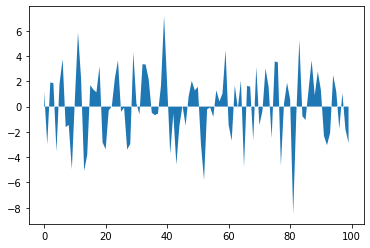

In [69]:
plt.fill_between(time, ma2_sample)
plt.show()

In [71]:
#find model params for generated sample

model = sm.tsa.ARMA(ma2_sample, (0,2)).fit(trend = 'nc', disp=0)
model.params

In [75]:
#below is function to help in generating  different series

np.random.seed(124)

arparams = np.array([0])
maparams = np.array([0.4, -0.4])
ar = np.r_[1, -arparams] #add zero lag and negate , np.r_ is simply making it one array
ma = np.r_[1, maparams] #add zero lag 
y = arma_generate_sample(ar,ma,100)

In [77]:
model = sm.tsa.ARMA(y, (0,2)).fit(trend='nc', disp=0)
model.params

## Section 5: The Autocorrelation Function (ACF)
There's a crucial question we need to answer: How do you choose the orders (p and q) for a time series

In order to answer that question, we need to understand the Autocorrelation Function (ACF). 

Let's start by showing an example ACF plot for our different simulated series.

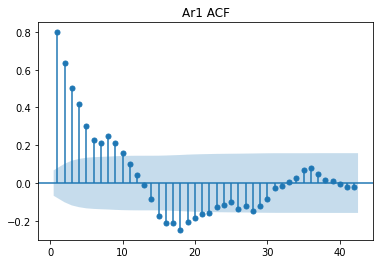

In [83]:
fig = sm.tsa.graphics.plot_acf(ar1_sample, lags=range(1,43), alpha=0.5, title='Ar1 ACF')
fig = sm.tsa.graphics.plot_acf(ma1_sample, lags=range(1,43), alpha=0.5, title = 'Ma1 ACF')

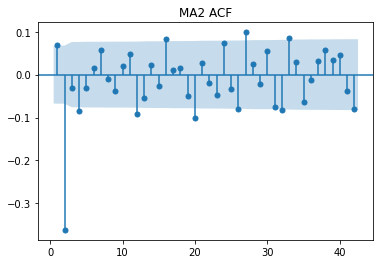

In [84]:
fig = sm.tsa.graphics.plot_acf(ar2_sample, lags=range(1,43), alpha=0.5, title='AR2 ACF' )
fig = sm.tsa.graphics.plot_acf(ma2_sample, lags=range(1,43), alpha=0.5, title='MA2 ACF')

## Section 6: The Partial Autocorrelation Function (PACF)

Choosing the order *p* of the AR model is important. Thankfully, there's a useful plot called the Partial Autocorrelation Function plot that can help us with that task. 

Let's look at an example.

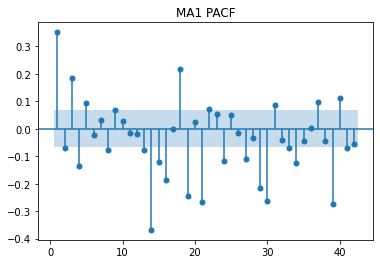

In [86]:
from statsmodels.graphics.tsaplots import plot_pacf

fig = sm.tsa.graphics.plot_pacf(ar1_sample, lags=range(1,43), alpha=0.5, title='AR1 PACF' )
fig = sm.tsa.graphics.plot_pacf(ma1_sample, lags=range(1,43), alpha=0.5, title='MA1 PACF')

The *partial autocorrelation* at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags. 

This makes choosing AR(1) models much easier.

First off, the blue region once again is the 95% confidence interval. 

The ACF is a way to measure the linear relationship between a current observation and observations at previous time periods. It turns out that often we are really only interested in the relationship between the current observation and a past value determined by a lag value. We often don't care about the relationship of values between the two, so we transform them to obtain the PACF. 

The PACF is a useful tool for identifying the order of the AR model.

For MA(1) model we should see that it slowly decays towards 0.

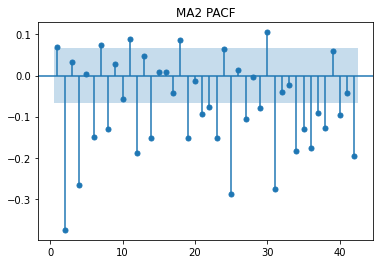

In [85]:
fig = sm.tsa.graphics.plot_pacf(ar2_sample, lags=range(1,43), alpha=0.5, title='AR2 PACF' )
fig = sm.tsa.graphics.plot_pacf(ma2_sample, lags=range(1,43), alpha=0.5, title='MA2 PACF')

## Exercise
You have been provided two datasets: 
1. **auto_1.csv**
2. **auto_2.csv**

Your task is to leverage what you've learned in this and previous courses. 

More specifically, you will do the following:
1. Read in **auto_1.csv** and **auto_2.csv**.
2. Create a time variable called **mytime** that starts at 0 and is as long as both datasets.
3. Generate fill between plots of auto_1 and auto_2.
4. Determine the order of p and q.
5. Fit model given chosen p and q. Feel free to play with fit of other models

In [87]:
path_to_file = './'

In [105]:
auto1 = pd.read_csv(path_to_file + 'auto_1.csv')
auto2 = pd.read_csv(path_to_file + 'auto_2.csv')

In [106]:
mytime = np.arange(len(auto1))

In [126]:
def Generate_fill_beetwen(time, data):
    plt.fill_between(time, data)
    plt.show()

In [129]:
auto1 = auto1.values.reshape(-1)
auto2 = auto2.values.reshape(-1)

AttributeError: AttributeError: 'numpy.ndarray' object has no attribute 'values'

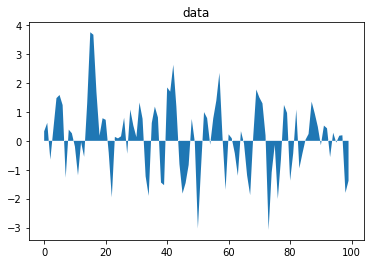

In [132]:
for Data in (auto1, auto2):
    Generate_fill_beetwen(time = mytime, data=Data)

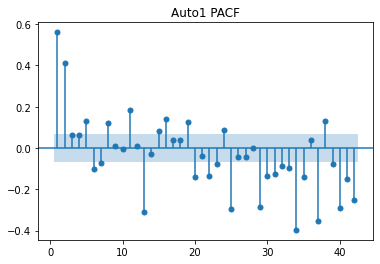

In [133]:
fig1 = sm.tsa.graphics.plot_acf(auto1, lags=range(1,43),alpha=0.5,title='Auto1 ACF')
fig1 = sm.tsa.graphics.plot_pacf(auto1, lags=range(1,43),alpha=0.5,title='Auto1 PACF')

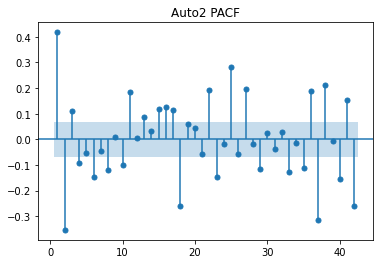

In [134]:
fig2 = sm.tsa.graphics.plot_acf(auto2, lags=range(1,43),alpha=0.5,title='Auto2 ACF')
fig2 = sm.tsa.graphics.plot_pacf(auto2, lags=range(1,43),alpha=0.5,title='Auto2 PACF')


#### 5. Estimate parameters of model with given choice of p and q

In [135]:
model = sm.tsa.ARMA(auto1, (2, 0)).fit(trend='nc', disp=0)
model.params

In [136]:
model = sm.tsa.ARMA(auto2, (0, 1)).fit(trend='nc', disp=0)
model.params